Welcome to the third post in my series on modeling the Coronavirus pandemic.  In the [first](http://www.davidketcheson.info/2020/03/17/SIR_model.html) and [second](http://www.davidketcheson.info/2020/03/19/SIR_Estimating_parameters.html) posts, we introduced the SIR model and used the available data to estimate the model parameters, in the absence of any mitigation (i.e. with no social distancing, quarantine, etc.).  In this post we'll put model and parameters together to see what they predict for the current pandemic.  We'll do this first assuming no mitigation, and then we'll make a very rough attempt to understand how mitigation may impact the predictions.

Remember, I am not an epidemiologist and I make no guarantees as to the accuracy of these predictions.  I don't recommend that you make precise plans based on the details of these predictions.  My goal is merely to show that with a bit of mathematics and common sense, we can have a reasonable idea of what the future holds.

# Predictions in the absence of mitigation

First, let's look at what we expect to happen without any mitigation.  In other words, this is a scenario in which schools and workplaces remain open, people continue to shake hands or kiss cheeks when greeting one another, and so forth.  **Note that the predictions here are NOT what we expect will actually happen, because we have intentionally ignored the effects of containment measures.**

Here are the basic assumptions leading to the predictions below:

  - The dynamics of the COVID-19 epidemic follow the SIR model, with parameters $\beta \approx 0.25$ and $\gamma \approx 0.05$.
  - No containment measures (like quarantine, closures, and social distancing) are implemented.
  - The number of confirmed cases at present is about 15 percent of the actual cases (this is a very rough guess based on some expert opinions).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, widgets
import matplotlib.dates as dates
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
matplotlib.rcParams['figure.figsize'] = (10., 6.)

In [2]:
def SIR(beta=0.25, gamma=0.05, N = 7770000000, confirmed_fraction=0.15):
    """ Model the current outbreak using the SIR model."""

    du = np.zeros(3)
    u0 = np.zeros(3)
    
    def f(t,u):
        du[0] = -beta*u[1]*u[0]/N
        du[1] = beta*u[1]*u[0]/N - gamma*u[1]
        du[2] = gamma*u[1]
        return du

    # Initial values
    total_cases = 199258./confirmed_fraction
    u0[2] = 81972./confirmed_fraction+7956  # Initial recovered
    u0[1] = total_cases-u0[2] # Initial infected
    u0[0] = N - u0[1] - u0[2]

    #dt = 0.01
    T = 400
    times = np.arange(0,T)
    solution = solve_ivp(f,[0,T],u0,t_eval=times)
    S = solution.y[0,:]
    I = solution.y[1,:]
    R = solution.y[2,:]

    today = '19/03/2020'
    start = dates.datestr2num(today)
    mydates = np.arange(400)+start
    
    plt.figure(figsize=(12,8))
    plt.plot_date(mydates,S/1.e9,'-',lw=3)
    plt.plot_date(mydates,I/1.e9,'-',lw=3)
    plt.plot_date(mydates,R/1.e9,'-',lw=3)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
    fig.autofmt_xdate()
    plt.legend(['Susceptible','Infected','Recovered'])
    plt.ylabel('Individuals (in billions)')
    plt.xlim(737503,737903)
    plt.text(737803, 6,r'$\beta$ = {}, $\gamma$ = {}'.format(beta,gamma),fontsize=15,bbox=dict(facecolor='white', alpha=1.0))
    return S, I, R
    #print(S[-1])

NameError: name 'fig' is not defined

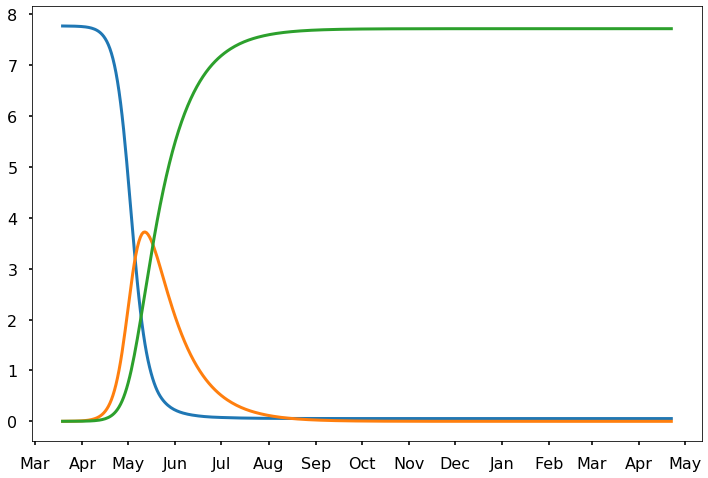

In [3]:
S, I, R = SIR(beta=0.25, gamma=0.05, confirmed_fraction=0.15)

There are several important things to notice here.  

## When does the maximum number of infected individuals occur, and how high is it?

As we expect, there is an initial exponential growth of infection that eventually levels off and then decreases after most of the population has been infected.  Recall from the first post that we expect the infection peak to occur when the fraction of susceptible individuals is $\gamma/\beta = 0.05/0.25 = 0.2$; i.e., when four-fifths of the world population has already been infected (including those who have recovered).  With the current parameters, this peak occurs around the middle of May and results in almost 4 billion concurrent cases.  Of course, the vast majority of those cases would not need medical care; based on our estimate of 15% reporting and less than 20% of reported cases being severe, perhaps only about 3% of all cases would require medical attention.  Even so, that would mean a peak of 100 million cases requiring medical attention simultaneously, worldwide.

## How many people catch the virus?

In this scenario, almost everyone in the world is eventually infected; by day 400 only 54 million susceptible individuals remain.

## How long does the epidemic last?

After mid-May, the epidemic begins to trail off gradually, but it is not until about early November that the number of infected drops back to below 1 million.  Thus (in this scenario) we should expect the severe epidemic to last at least several months.  Of course, it would make sense for those who have already recovered from the virus -- which is most of the world population -- to go back to work/school in the early Fall, 

# Variations on the average scenario

In the last post, we saw that there is significant uncertainty in the value of $\gamma$ and especially $\beta$.  How do these predictions change if we vary $\beta$?  We found values in the range $(0.2, 0.3)$, so let's look at what happens for each of the extremes of this interval:

NameError: name 'fig' is not defined

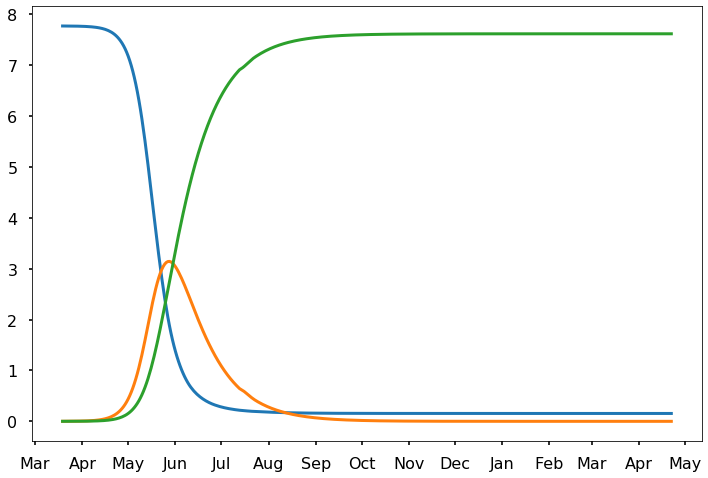

In [4]:
S, I, R = SIR(beta=0.2, gamma=0.05, confirmed_fraction=0.15)

With a smaller value of $\beta=0.2$, the virus spreads more slowly; the peak occurs near June 1st with just over 3 billion infected.  Again, almost the entire world catches the virus (eventually 150 million susceptibles remain), and the number of cases does not drop below 1 million until November.

NameError: name 'fig' is not defined

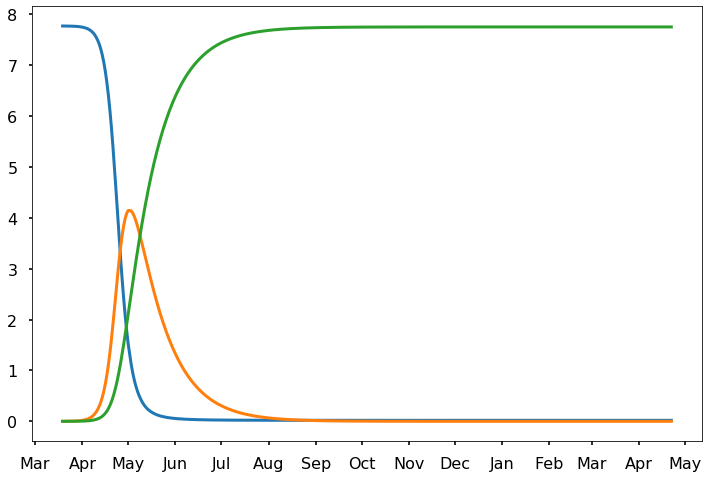

In [5]:
S, I, R = SIR(beta=0.3, gamma=0.05, confirmed_fraction=0.15)

With a larger values of $\beta=0.3$, the virus spreads more quickly; the peak occurs in early May with just over 4 billion infected.  The epidemic ends a bit sooner, with the number of cases dropping below 1 million some time in October.  Only 19 million people remain susceptible after a year.

As we can see, even with these fairly large changes in $\beta$, the general picture remains the same.  We can expect the epidemic to peak in May or June and last into the fall.

interactive(children=(FloatSlider(value=0.25, description='$\\beta$', max=0.5, min=0.01, step=0.01), FloatSlid…

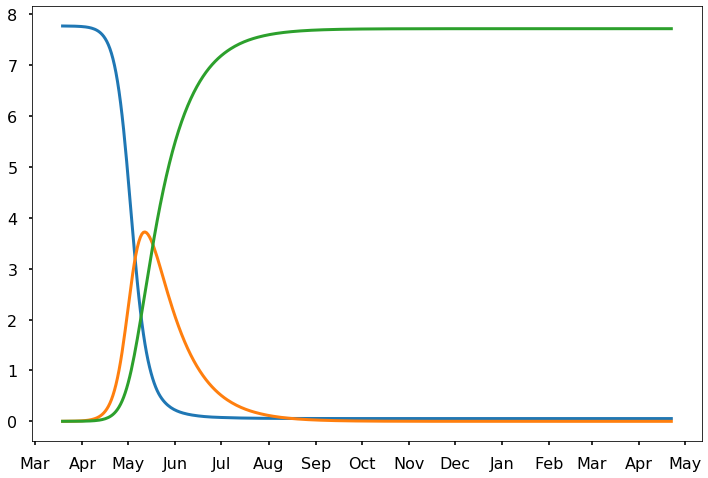

In [6]:
interact(SIR,beta=widgets.FloatSlider(min=0.01,max=0.5,step=0.01,value=0.25,description=r'$\beta$'),
         gamma=widgets.FloatSlider(min=0.01,max=0.5,step=0.01,value=0.05,description=r'$\gamma$'),
         N = widgets.fixed(7770000000),
         confirmed_fraction=widgets.FloatSlider(min=0.01,max=1.0,step=0.01,value=0.15,description=r'Fraction C'));

# The effect of mitigation

As I write this, almost every country in the world is adopting measures to mitigate the spread of the virus.  This includes closing schools and workplaces, quarantining infected individuals and their contacts, and encouraging people to stay home.

For simplicity we can view all of these mitigation measures as having a single effect: increasing the average time between encounters, or in other words reducing $\beta$.    Remember that $\beta$ is the average number of people per day that a given individual has close contact with.  Since $\beta$ is a constant in our model but the mitigation techniques and their effectiveness may vary over time, we can incorporate mitigation by adding a new factor $q(t)\in[0,1]$ multiplying $\beta$:

\begin{align}
\frac{dS}{dt} & = -q(t)\beta I \frac{S}{N} \\
\frac{dI}{dt} & = q(t)\beta I \frac{S}{N}-\gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align}

What is the meaning of $q(t)$?  If there were an absolute quarantine, with no human contact at all, we would have $q=0$, whereas if no measures are implemented then we would have $q=1$ (corresponding to the predictions above).  In the real world, $q$ will be somewhere between these extremes.

What is the correct value of $q$?  Frankly, I have no idea and I doubt that even the experts can say with confidence.  But we can hypothesize some values and explore their impact.  For simplicity, we'll assume that some value $q<1$ is achieved through mitigation measures starting now and lasting for the next $N_q$ days.  After $N_q$ days, these measures are lifted so that society (and $\beta$) returns to normal.

If we could maintain mitigation measures forever (i.e. $N_q=\infty$) then this mitigation would have exactly the same effect as reducing $\beta$.  As we saw above, smaller values of $\beta$ lead to a smaller infection peak, but a longer epidemic.

Of course, we do not expect mitigation to last forever; people must go back to work eventually.  This can have some surprising effects.

In [7]:
def SIR_mitigated(beta=0.25, gamma=0.05, N = 7770000000, confirmed_fraction=0.15, q=0.5, Nq=180):
    """ Model the current outbreak using the SIR model."""

    du = np.zeros(3)
    u0 = np.zeros(3)
    
    def f(t,u):
        if t<Nq:
            qval = q
        else:
            qval = 1.
        du[0] = -qval*beta*u[1]*u[0]/N
        du[1] = qval*beta*u[1]*u[0]/N - gamma*u[1]
        du[2] = gamma*u[1]
        return du

    # Initial values
    total_cases = 199258./confirmed_fraction
    u0[2] = 81972./confirmed_fraction+7956  # Initial recovered
    u0[1] = total_cases-u0[2] # Initial infected
    u0[0] = N - u0[1] - u0[2]

    #dt = 0.01
    T = 400
    times = np.arange(0,T)
    solution = solve_ivp(f,[0,T],u0,t_eval=times,method='RK23')
    S = solution.y[0,:]
    I = solution.y[1,:]
    R = solution.y[2,:]

    today = '19/03/2020'
    start = dates.datestr2num(today)
    mydates = np.arange(T)+start
    
    plt.figure(figsize=(12,8))
    plt.plot_date(mydates,S/1.e9,'-',lw=3)
    plt.plot_date(mydates,I/1.e9,'-',lw=3)
    plt.plot_date(mydates,R/1.e9,'-',lw=3)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
    fig.autofmt_xdate()
    plt.legend(['Susceptible','Infected','Recovered'])
    plt.ylabel('Individuals (in billions)')
    plt.xlim(737503,737503+T)
    plt.text(737803, 6,r'$\beta$ = {}, $\gamma$ = {}'.format(beta,gamma),fontsize=15,bbox=dict(facecolor='white', alpha=1.0))
    plt.text(737803, 5.4,r'$q$ = {}, $N_q$ = {}'.format(q,Nq),fontsize=15,bbox=dict(facecolor='white', alpha=1.0))

As a first scenario, let's imagine that $q=1/2$; i.e., we are able to reduce the amount of human contact by 50%, and $N_q=180$ (about six months).

NameError: name 'fig' is not defined

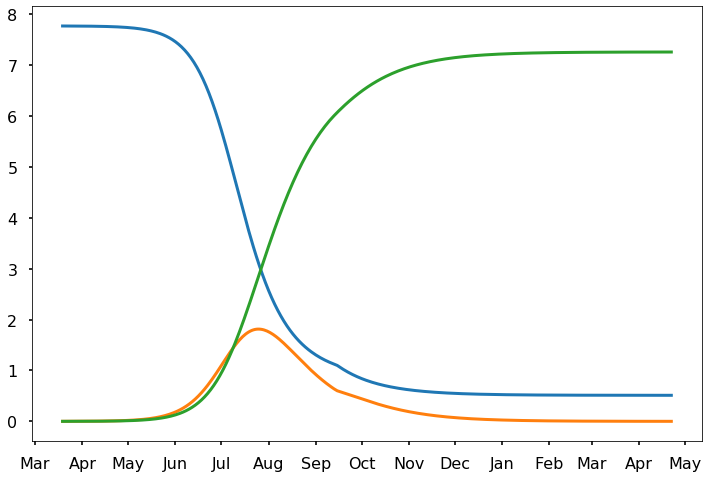

In [8]:
SIR_mitigated(beta=0.25, gamma=0.05, confirmed_fraction=0.15, q=0.5, Nq=180)

We see that this mitigation makes a substantial difference.  Now the peak point of infection is delayed until late June, with less than 2 billion simultaneous cases at maximum.  Notice the bump in the number of cases around mid-September when the restrictions are relaxed.  Another effect of this mitigation is that the time in which there are some significant number of cases lasts much longer -- in this scenario there are still more than 1 million cases even 1 year from now.  It's still true that most of the world catches the virus eventually, but about 480 million susceptibles remain even after two years.

Next let's consider an even more successful mitigation: suppose that we cut human contact by three-fourths, so $q=0.25$, with measures again lasting $N_q$=180 days.

NameError: name 'fig' is not defined

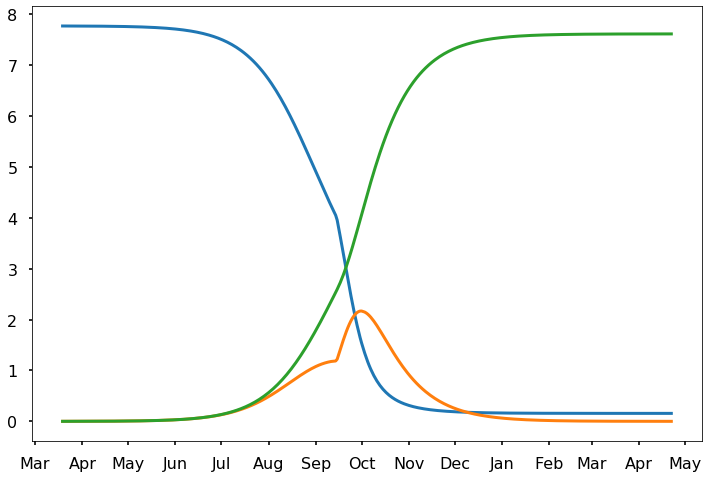

In [9]:
SIR_mitigated(beta=0.25, gamma=0.05, confirmed_fraction=0.15, q=0.4, Nq=180)

Here the initial growth is even slower, and we see an interesting phenomenon: the infection appears to reach a peak around mid-September, right when restrictions are relaxed.  But the relaxing of restrictions allows the virus to suddenly spread much faster, leading to a higher peak in early October.  What's quite surprising and counterintuitive is that **even though we have stronger mitigation, the peak is actually higher in this case than in the previous case**.  Why?  It's because the very strong mitigation for 180 days means that at the end of that period there is still a large proportion of susceptible people, leading to stronger growth of the epidemic when mitigation ends.

# When should we let society go back to normal?

A natural question at this point is, when is it okay to let everyone go back to school and to work?  There are many possible answers, but perhaps a reasonable one can be obtained as follows.  Let's assume that our goal is to ensure that the number of infected $I(t)$ will not increase when we send everyone back to work; i.e., when we let $q$ go back up to 1.  We have

\begin{align}
\frac{dI}{dt} & = (q\beta \frac{S}{N}-\gamma) I.
\end{align}

To ensure that $dI/dt<0$ even with $q=1$, we need the susceptible fraction $S/N$ to have fallen to $\gamma/\beta$ -- the same condition we found previously for when the infection peak would occur (without mitigation).  Using the parameter values we found in the last post, this means we should wait until 80% of the population has been infected before returning to normal.  This is probably too cautious, since ending mitigation a bit sooner (but after the initial peak of infection) would only lead to a small subsequent rise, with a second infection peak smaller than the first:

NameError: name 'fig' is not defined

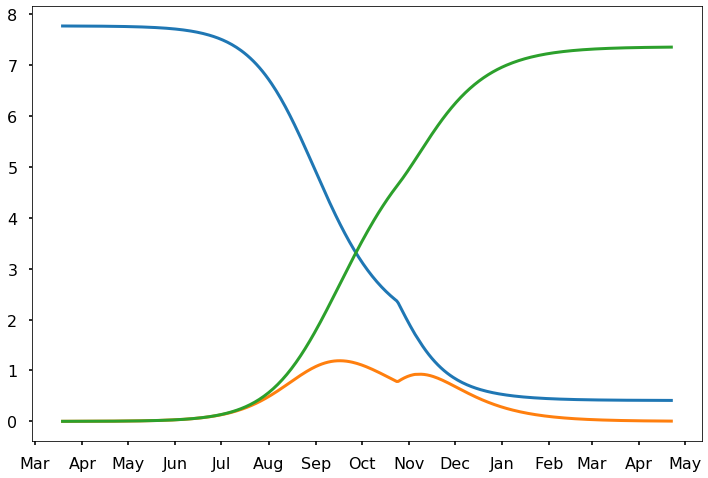

In [10]:
SIR_mitigated(beta=0.25,gamma=0.05,q=0.4,Nq=220)

Of course, other strategies are possible and could make sense, like sending people back to work as soon as they have tested positive and then recovered from the virus.  And more complicated mitigation strategies are possible (and likely) in which some restrictions are relaxed while others remain in place.  All of these will have to be weighed against the cost they impose on our lives.

In the [Jupyter notebook for this post]() there is an interactive widget that lets you experiment with the model, including all five of the parameters we have discussed.  The possible effects are quite interesting and we have only touched on the basics here.  I encourage you to try it out!

interactive(children=(FloatSlider(value=0.25, description='$\\beta$', max=0.5, min=0.01, step=0.01), FloatSlid…

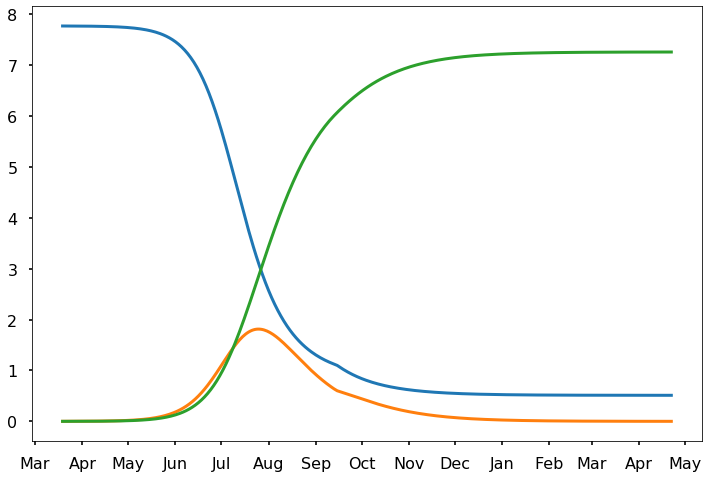

In [11]:
interact(SIR_mitigated,beta=widgets.FloatSlider(min=0.01,max=0.5,step=0.01,value=0.25,description=r'$\beta$'),
         gamma=widgets.FloatSlider(min=0.01,max=0.5,step=0.01,value=0.05,description=r'$\gamma$'),
         N = widgets.fixed(7770000000),
         confirmed_fraction=widgets.FloatSlider(min=0.01,max=1.0,step=0.01,value=0.15,description=r'Fraction C'),
         q = widgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.5),
         Nq = widgets.IntSlider(min=10, max=400, step=5, value=180));

# Further considerations

There are a number of potentially important factors that we have ignored here, including:

  - Possible seasonal effects on the spread of Coronavirus.  Currently there seems to be no way to know if COVID-19 will be seasonal like the flu.
  - Development of a vaccine.  As we have seen, significantly reducing the number of susceptible individuals can rapidly halt the spread of a disease, even if not every individual is vaccinated.  So if a vaccine appears and can be mass produced before the fall, it could susbstantially shorten the duration of the epidemic and reduce its impact.  On the other hand, it seems that a vaccine arriving after a year would be too late to have much impact.